### Лейман М.А.
# Теория вероятностей


### Импорты

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

## Задание 1.
#### В ящике находится 15 качественных и 5 бракованных деталей. Наудачу извлекаются 2 детали.
#### Найти вероятность того, что:  

#### A) обе детали будут качественными;  
#### B) одна деталь будет качественной, а одна – бракованной;  
#### C) обе детали бракованны.

Всего деталей:  
n=15+5=20,  
Качественных деталей:  
k=15,  
Бракованных деталей:   
b=5.

In [ ]:
# Функция для вычисления сочетаний C(n, k)
def combinations(n, k):
    return math.comb(n, k)

# Данные задачи
n = 20  # общее количество деталей
k = 15  # количество качественных деталей
b = 5   # количество бракованных деталей

# 1) Вероятность, что обе детали качественные
total_comb = combinations(n, 2)  # общее число сочетаний
quality_comb = combinations(k, 2)  # сочетания для качественных деталей
p_A = quality_comb / total_comb  # вероятность

# 2) Вероятность, что одна деталь качественная, а другая бракованная
one_quality_one_defect = combinations(k, 1) * combinations(b, 1)  # сочетания для 1 качественной и 1 бракованной
p_B = one_quality_one_defect / total_comb  # вероятность

# 3) Вероятность, что обе детали бракованные
defect_comb = combinations(b, 2)  # сочетания для бракованных деталей
p_C = defect_comb / total_comb  # вероятность

# Вывод результатов
print(f"A) Вероятность, что обе детали качественные: {p_A:.4f}")
print(f"B) Вероятность, что одна деталь качественная, а другая бракованная: {p_B:.4f}")
print(f"C) Вероятность, что обе детали бракованные: {p_C:.4f}")


A) Вероятность, что обе детали качественные: 0.5526
B) Вероятность, что одна деталь качественная, а другая бракованная: 0.3947
C) Вероятность, что обе детали бракованные: 0.0526


## Задание 2.  
#### При рентгеновском обследовании вероятность обнаружить заболевание туберкулезом у больного  туберкулезом равна 0.9, вероятность принять здорового человека за больного равна 0.01. Доля  больных туберкулезом по отношению ко всему населению равна 0.001.
#### Найти вероятность того, что человек здоров, если он был признан больным при обследовании.


In [ ]:
# Заданные вероятности
P_A_B1 = 0.01  # вероятность ложноположительного результата
P_A_B2 = 0.9   # вероятность верного диагноза
P_B2 = 0.001         # вероятность того, что человек болен
P_B1 = 1 - P_B2      # вероятность того, что человек здоров

# Применение формулы Байеса для нахождения P(B1 | A)
P_B1_A = (P_A_B1 * P_B1) / (P_A_B1 * P_B1 + P_A_B2 * P_B2)

# Вывод результата
print(f"Вероятность того, что человек здоров: {P_B1_A:.4f}")


Вероятность того, что человек здоров: 0.9174


## Задание 3.  
#### Известно, что случайная величина «время до наступления отказа исследуемых изделий» подчиняется логнормальному распределению (lognorm) с параметрами loc=0, scale=5, s=0.5.
#### Требуется построить графики функции плотности и функции распределения, найти математическое ожидание, дисперсию и время безотказной работы с вероятностью 0.9 (квантиль уровня 0.1).

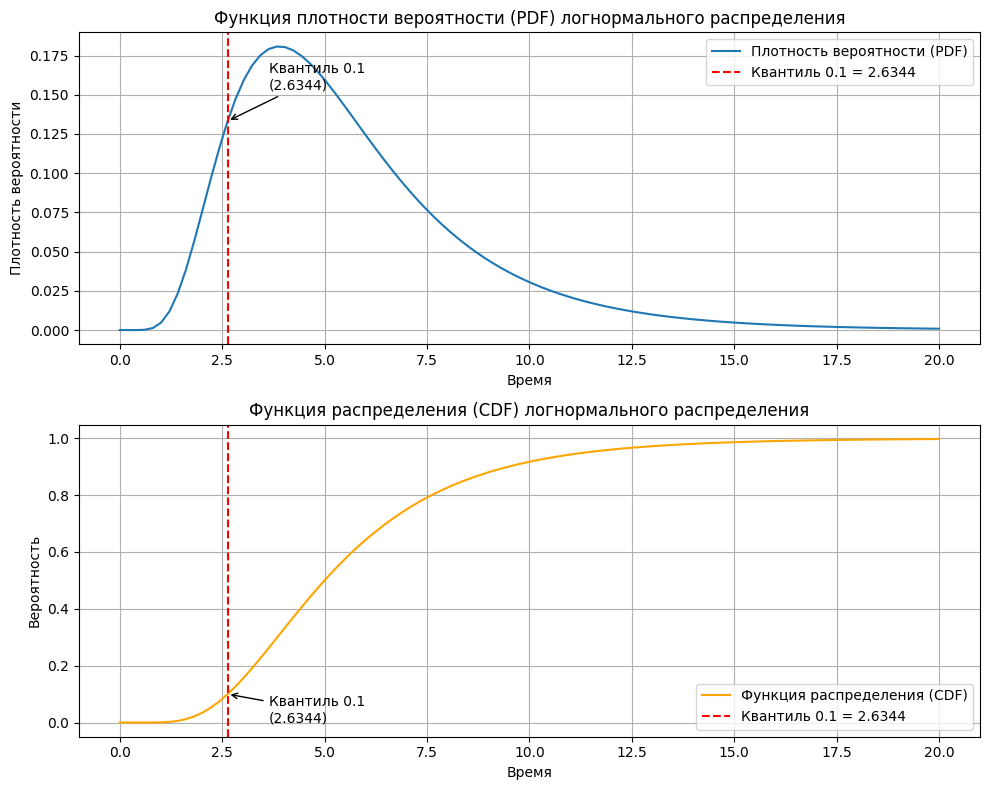

Математическое ожидание: 5.6657
Дисперсия: 9.1174
Квантиль уровня 0.1 (время безотказной работы с вероятностью 0.9): 2.6344


In [ ]:
# Параметры логнормального распределения
s = 0.5  # стандартное отклонение
scale = 5
loc = 0

# Определяем логнормальное распределение
dist = lognorm(s=s, scale=scale, loc=loc)

# 1. Построим графики функции плотности (PDF) и функции распределения (CDF)
x = np.linspace(0, 20, 100)  # значения времени для графиков
pdf = dist.pdf(x)  # плотность вероятности
cdf = dist.cdf(x)  # функция распределения

# 2. Найдем квантиль уровня 0.1 (время безотказной работы с вероятностью 0.9)
quantile_0_1 = dist.ppf(0.1)

# Построение графиков
plt.figure(figsize=(10, 8))

# График функции плотности (PDF)
plt.subplot(2, 1, 1)
plt.plot(x, pdf, label="Плотность вероятности (PDF)")
plt.axvline(quantile_0_1, color='red', linestyle='--', label=f'Квантиль 0.1 = {quantile_0_1:.4f}')
plt.title("Функция плотности вероятности (PDF) логнормального распределения")
plt.xlabel("Время")
plt.ylabel("Плотность вероятности")
plt.grid(True)
plt.legend()
plt.annotate(f'Квантиль 0.1\n({quantile_0_1:.4f})', xy=(quantile_0_1, dist.pdf(quantile_0_1)),
             xytext=(quantile_0_1 + 1, dist.pdf(quantile_0_1) + 0.02),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=10)

# График функции распределения (CDF)
plt.subplot(2, 1, 2)
plt.plot(x, cdf, label="Функция распределения (CDF)", color='orange')
plt.axvline(quantile_0_1, color='red', linestyle='--', label=f'Квантиль 0.1 = {quantile_0_1:.4f}')
plt.title("Функция распределения (CDF) логнормального распределения")
plt.xlabel("Время")
plt.ylabel("Вероятность")
plt.grid(True)
plt.legend()
plt.annotate(f'Квантиль 0.1\n({quantile_0_1:.4f})', xy=(quantile_0_1, dist.cdf(quantile_0_1)),
             xytext=(quantile_0_1 + 1, dist.cdf(quantile_0_1) - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=10)

#
plt.tight_layout()
plt.show()

# Вывод
mean = dist.mean()  # математическое ожидание
variance = dist.var()  # дисперсия

print(f"Математическое ожидание: {mean:.4f}")
print(f"Дисперсия: {variance:.4f}")
print(f"Квантиль уровня 0.1 (время безотказной работы с вероятностью 0.9): {quantile_0_1:.4f}")
